<font size="6">Introduction:</font>

According to World Health Organization (WHO), heart diseases cause about 12 million deathes worldwide. In the United 
States of America, heart diseases are responsible for half of annual deasthes. According to WHO, the early prognosis of 
heart problems can significantly help to reduce the heart diseases related fatalities and complications. This research and
modeling efforts intends to pinpoint the most relevant risk factors of heart disease as well as predict the overall risk using different regression models, including Logistic Regression and Decision Tree model.

<font size="6">Data Source:</font>

"The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on 
residents of the town of Framingham, Massachusetts. 
https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regression
The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).It includes over 4,000 records and 15 attributes."

<font size="6">Methodology:</font>

I will be building two models: Logistic Regression Model and Random Forest Classifier Model

<font size="6">Importing Libraries </font>

In [2]:
#Here, we import all necessary libraries. Also, we want to see all figures within the notebook.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.figure as figure
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

%matplotlib inline

<font size="6">Data Cleaning and Preparation </font>

In [3]:
#Loading data into program and checking the data
data_raw = pd.read_csv("framingham.csv")
data_raw2 = pd.read_csv("framingham.csv")
data_raw.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
#Checking data for missing data
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [5]:
#As there are a few missing data, I am going to count and visualize the null data:
data_raw.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

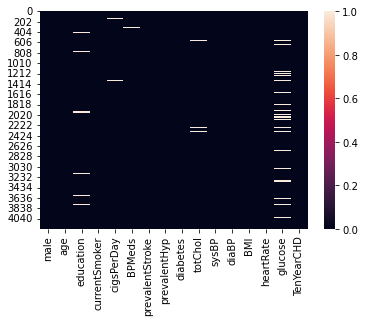

In [6]:
sns.heatmap(data_raw.isnull())
plt.show()

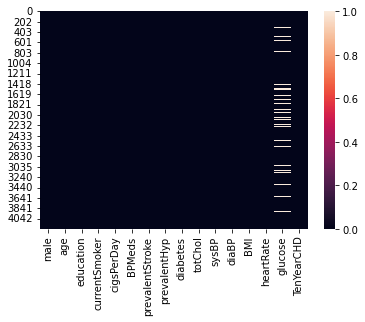

In [8]:
sns.heatmap(data_raw_NoNA_Base.isnull())
plt.show()

In [9]:
#Filling missing data in "glucose" column with the columns median to keep them in data set
#First command prevents chained assignments error
pd.options.mode.chained_assignment = None
data_raw_NoNA_Base['glucose'].fillna(data_raw_NoNA_Base['glucose'].median(), inplace=True)
data = data_raw_NoNA_Base


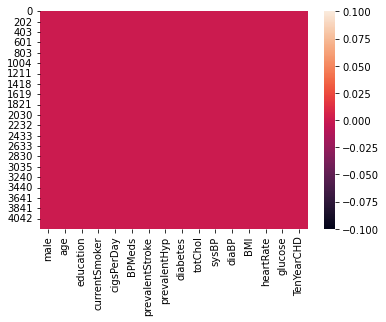

In [10]:
sns.heatmap(data.isnull())
plt.show()

<font size="6">Exploratory Data Visualization:</font>

<Figure size 14400x14400 with 0 Axes>

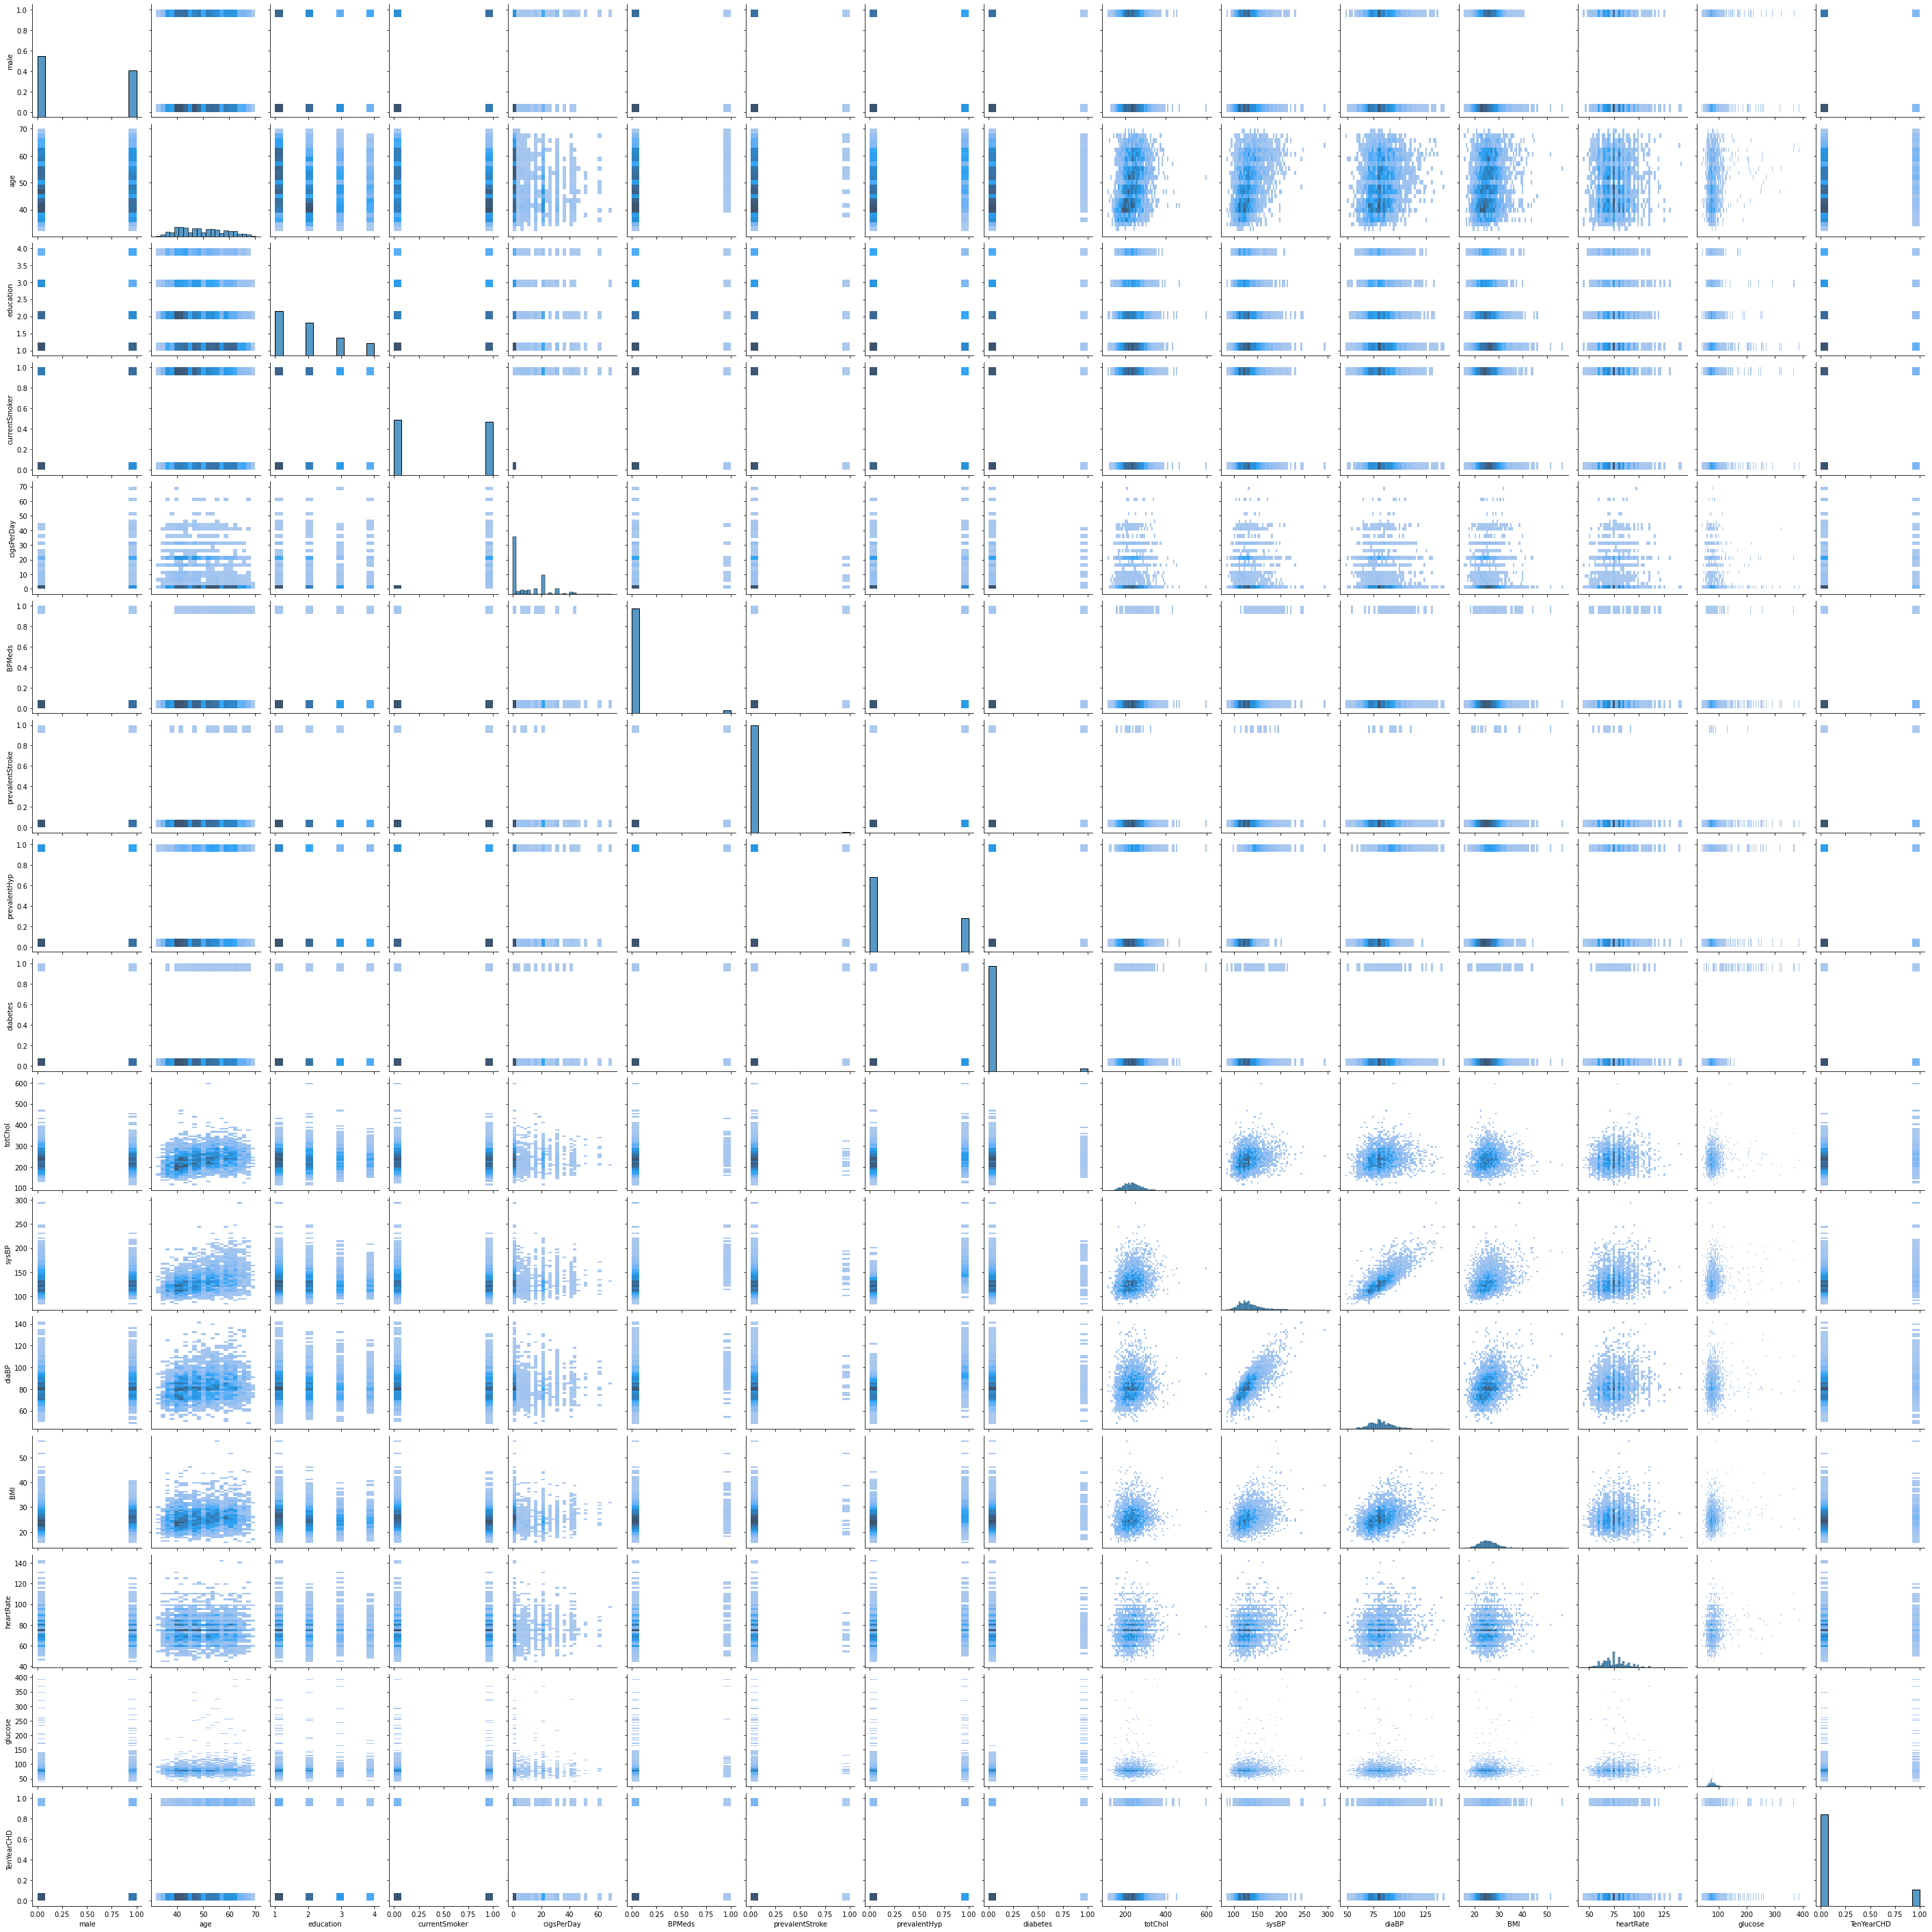

In [157]:
plt.figure(figsize=(200,200))
sns.pairplot(data,palette="Set2",kind='hist')
plt.show()

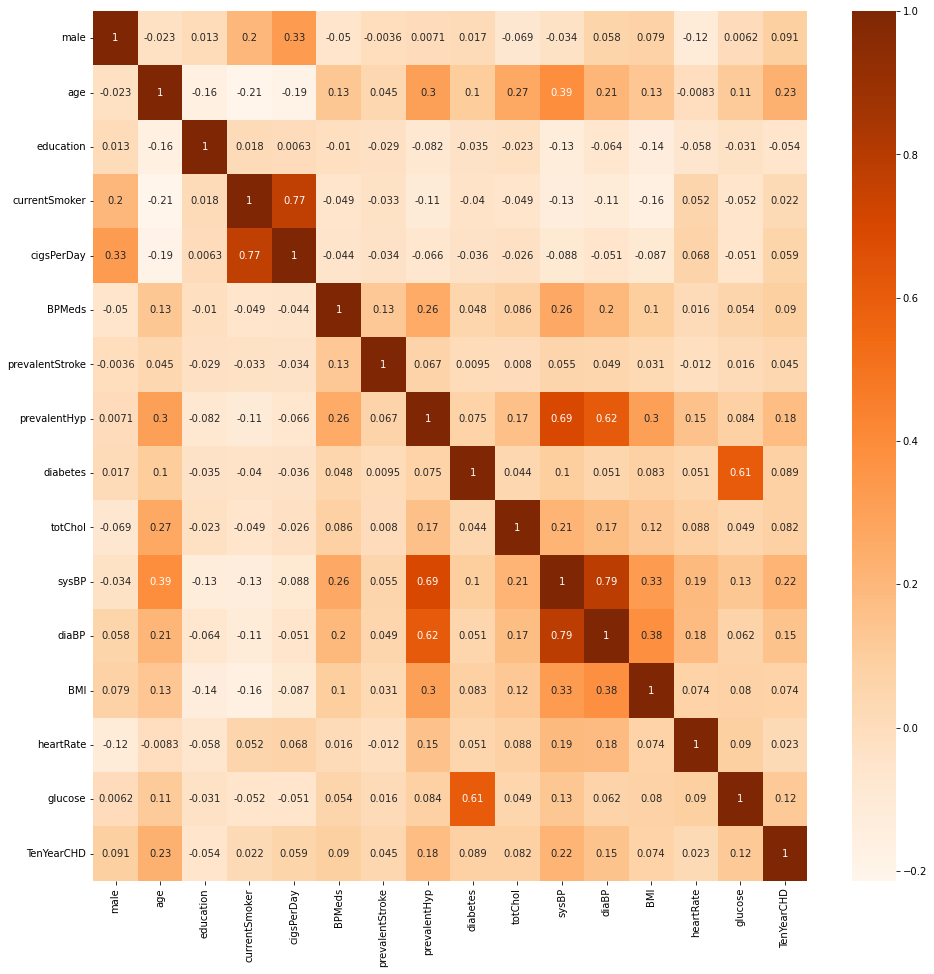

In [11]:
plt.figure(figsize=(16,16))
sns.heatmap(data.corr(),cmap="Oranges",annot=True)
plt.show()

<font size="6">Logistic Regression:</font>

In [13]:
# Selecting x and y for modeling and then defining train and test data set (70% for training and 30% for test)
X=data.iloc[:,:].drop(columns=['TenYearCHD','education','glucose'])
y=data['TenYearCHD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [16]:
# Increasing number of iteration to 2000 to solve "lbfgs failed to converge (status=1)"
LoR = LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=2500)

In [17]:
LoR.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=2500)

In [18]:
predictions = LoR.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.69      0.79       844
           1       0.28      0.65      0.39       153

    accuracy                           0.69       997
   macro avg       0.60      0.67      0.59       997
weighted avg       0.82      0.69      0.73       997



In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[586, 258],
       [ 54,  99]], dtype=int64)

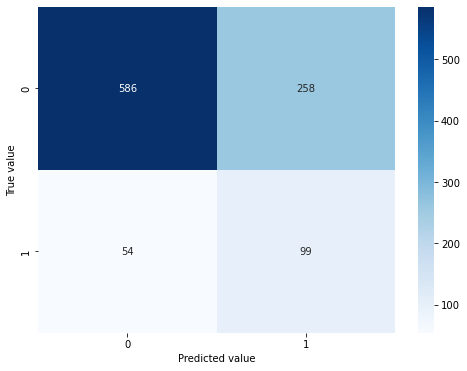

In [21]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True, cmap='Blues', fmt='d',linecolor='red' )
plt.xlabel('Predicted value')
plt.ylabel('True value')
plt.show()

In [22]:
# The regression model doesn't work very well! Specially in predicting "1" true values. This means, patients with 
# posibility of heart attack will be missing. This is more dangerous than identifying those without chance of heart attack
# as possible cases. Accoirdingly, I am going to try Decision Tree model.

<font size="6">Decision Tree_Random Forest Classifier:</font>

In [23]:
data2 = data_raw2.drop(columns=['education'])

In [24]:
data2=data2.dropna(axis=0)

In [25]:
X2=data2.iloc[:,:].drop(columns=['TenYearCHD'])
y2=data2['TenYearCHD']

In [26]:
x2_train,x2_test,y2_train,y2_test=train_test_split(X2,y2)

In [27]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier()
RFC.fit(x2_test,y2_test)

RandomForestClassifier()

In [28]:
predictions2=RFC.predict(x2_test)

In [29]:
confusion_matrix(y2_test,predictions2)

array([[802,   0],
       [  0, 136]], dtype=int64)

In [30]:
print(classification_report(y2_test,predictions2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       802
           1       1.00      1.00      1.00       136

    accuracy                           1.00       938
   macro avg       1.00      1.00      1.00       938
weighted avg       1.00      1.00      1.00       938



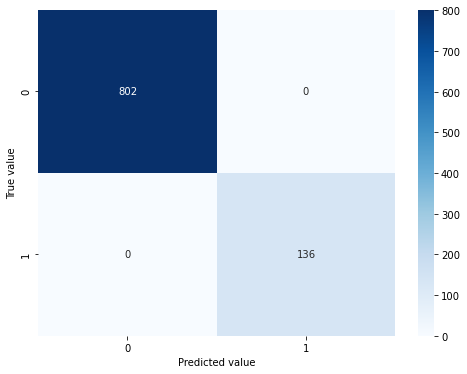

In [37]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y2_test,predictions2),annot=True, cmap='Blues', fmt='d',linecolor='white' )
plt.xlabel('Predicted value')
plt.ylabel('True value')
plt.show()

In [38]:
# AND I love decision tree models :)


<font size="6">Conclusion and Discussion:</font>

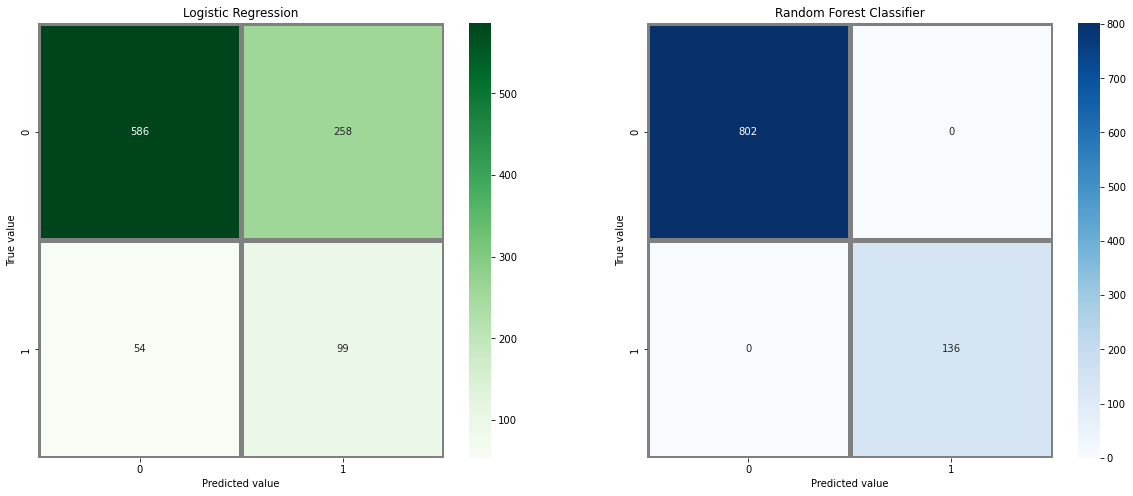

In [39]:
plt.rcParams["figure.figsize"] = (20,8)
fig, (ax1, ax2) = plt.subplots(ncols=2)



sns.heatmap(confusion_matrix(y_test,predictions),annot=True, cmap='Greens', fmt='d',lw=5, linecolor='grey',ax=ax1).\
set(title='Logistic Regression', xlabel='Predicted value', ylabel='True value')

sns.heatmap(confusion_matrix(y2_test,predictions2),annot=True, cmap='Blues', fmt='d',lw=5, linecolor='grey', ax=ax2).\
set(title='Random Forest Classifier', xlabel='Predicted value', ylabel='True value')


plt.show()


In [187]:
# Here, I created two different models for heart disease prediction using Logistic Regression and Random Forest Classifier. 
# I started this project by data cleaning, meaning removing candidates with any type of data missing.

# The main problem with Logistic Regression is its low recall value, 0.65. This means the model is able to identify only 65%
# of those with disease. At the same time, low precision, 0.28, is alarming as it shows only 30 percent of those flagged
# are real patients and the rest are not.

# However, Decision tree works very well in this case, with 100% success in predicting 0s and 1s.